In [3]:
!pip install emoji
!pip install nltk
import nltk
nltk.download('stopwords')
import pandas as pd
import re
import emoji
from nltk.corpus import stopwords
import nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 14.9 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df = pd.read_csv("/content/fitness_brands_comments.csv")



In [5]:
stop_words = set(stopwords.words('english'))

# --- Cleaning function (no emoji lib needed) ---
def clean_text(text):
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r"http\S+|www.\S+", "", text)

    # Remove emojis (basic regex for unicode emoji ranges)
    text = re.sub(r"["
                  u"\U0001F600-\U0001F64F"  # emoticons
                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                  u"\U0001F1E0-\U0001F1FF"  # flags
                  "]+", "", text)

    # Remove special characters (keep words and numbers)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)

    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    # Remove stopwords
    text = " ".join([w for w in text.split() if w not in stop_words])

    return text

# --- Apply cleaning ---
df["clean_comment"] = df["comment"].apply(clean_text)

# Drop duplicates and missing values
df = df.drop_duplicates(subset="clean_comment")
df = df.dropna(subset=["clean_comment"])

# Preview cleaned comments
print(df[["comment", "clean_comment"]].head(10))

                                             comment  \
0  I sat down and figured this out a few weeks ag...   
1  I don’t think you understand what the definiti...   
2  You should either learn more about the job or ...   
3  Why did you accept a job that you clearly have...   
4  Members are told about the annual fee during t...   
5  Classic Annual membership is cheaper, $99 a ye...   
6  Practically all gyms have a monthly fee on top...   
7  This is not a scam it’s called reading the fin...   
8                                     You need help.   
9  No.  The annual fee is stupid and kind of a mo...   

                                       clean_comment  
0  sat figured weeks ago im paying 10month 49 ann...  
1         dont think understand definition scam isnt  
2   either learn job find new one claiming scam aint  
3  accept job clearly ethical issues nothing scam...  
4  members told annual fee rates sheet presentati...  
5  classic annual membership cheaper 99 year some... 



1.  Lemmatization




In [10]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Download resources (only run once)
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("averaged_perceptron_tagger")
nltk.download("averaged_perceptron_tagger_eng")
nltk.download("wordnet")
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# POS tag converter (Treebank -> WordNet)
def get_wordnet_pos(tag):
    if tag.startswith("J"):
        return wordnet.ADJ
    elif tag.startswith("V"):
        return wordnet.VERB
    elif tag.startswith("N"):
        return wordnet.NOUN
    elif tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Lemmatization function
def lemmatize_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www.\S+", "", text)   # remove URLs
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)   # remove special chars
    text = re.sub(r"\s+", " ", text).strip()     # normalize spaces

    # Tokenize + POS tagging
    words = nltk.word_tokenize(text)
    lemmatized = [
        lemmatizer.lemmatize(word, get_wordnet_pos(tag))
        for word, tag in pos_tag(words)
        if word not in stop_words
    ]
    return " ".join(lemmatized)

# ✅ Apply lemmatization on your already-cleaned df
df_cleaned = df.copy()
df_cleaned["lemmatized_comment"] = df_cleaned["clean_comment"].apply(lemmatize_text)

# Drop duplicates if needed
df_cleaned = df_cleaned.drop_duplicates(subset="lemmatized_comment")

# Preview
print(df_cleaned[["comment", "clean_comment", "lemmatized_comment"]].head(10))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             comment  \
0  I sat down and figured this out a few weeks ag...   
1  I don’t think you understand what the definiti...   
2  You should either learn more about the job or ...   
3  Why did you accept a job that you clearly have...   
4  Members are told about the annual fee during t...   
5  Classic Annual membership is cheaper, $99 a ye...   
6  Practically all gyms have a monthly fee on top...   
7  This is not a scam it’s called reading the fin...   
8                                     You need help.   
9  No.  The annual fee is stupid and kind of a mo...   

                                       clean_comment  \
0  sat figured weeks ago im paying 10month 49 ann...   
1         dont think understand definition scam isnt   
2   either learn job find new one claiming scam aint   
3  accept job clearly ethical issues nothing scam...   
4  members told annual fee rates sheet presentati...   
5  classic annual membership cheaper 99 year so

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...



Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.72      0.77      3221
     neutral       0.82      0.89      0.85      2431
    positive       0.85      0.89      0.87      5392

    accuracy                           0.84     11044
   macro avg       0.83      0.83      0.83     11044
weighted avg       0.84      0.84      0.84     11044


Confusion Matrix:
[[2321  240  660]
 [  86 2169  176]
 [ 368  251 4773]]

Brand Sentiment Distribution:
ml_sentiment        negative   neutral  positive
brand                                           
Anytime Fitness     0.277792  0.195770  0.526439
Gold's Gym          0.251642  0.251383  0.496974
Nike Training Club  0.135559  0.237057  0.627384
Peloton             0.227982  0.249859  0.522159
Planet Fitness      0.287653  0.251723  0.460624


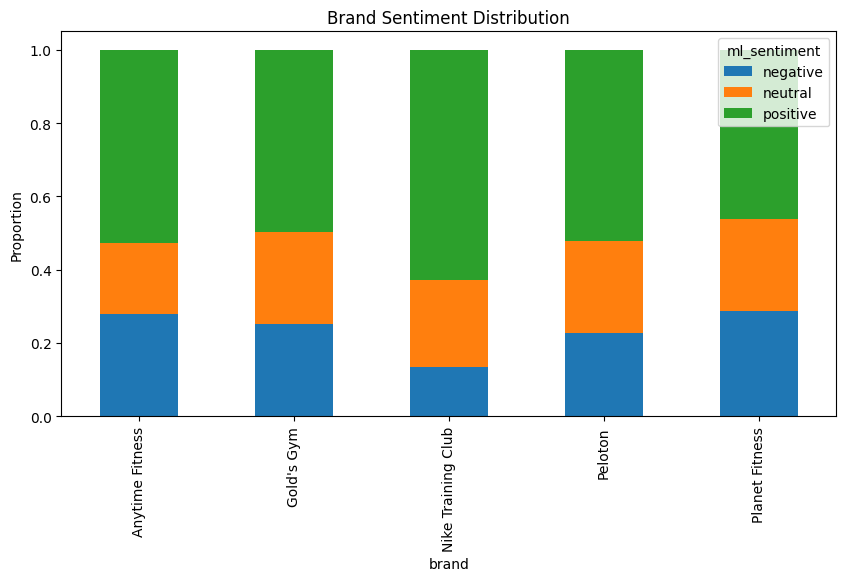

In [19]:
# --- Imports ---
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import nltk

# Download VADER lexicon if not already
nltk.download("vader_lexicon")

# --- Step 1: Bootstrap Labels with VADER ---
sia = SentimentIntensityAnalyzer()
df_cleaned["compound"] = df_cleaned["lemmatized_comment"].apply(lambda x: sia.polarity_scores(x)["compound"])

def classify(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df_cleaned["sentiment"] = df_cleaned["compound"].apply(classify)

# --- Step 2: TF-IDF + Logistic Regression ---
X = df_cleaned["lemmatized_comment"]
y = df_cleaned["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train_tfidf, y_train)

# --- Step 3: Evaluation ---
y_pred = clf.predict(X_test_tfidf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# --- Step 4: Predict All Comments ---
df_cleaned["ml_sentiment"] = clf.predict(vectorizer.transform(df_cleaned["lemmatized_comment"]))

# --- Step 5: Brand-level Sentiment Distribution ---
brand_sentiment = df_cleaned.groupby("brand")["ml_sentiment"].value_counts(normalize=True).unstack().fillna(0)
print("\nBrand Sentiment Distribution:")
print(brand_sentiment)

# --- Step 6: Visualization ---
brand_sentiment.plot(kind="bar", stacked=True, figsize=(10,5), title="Brand Sentiment Distribution")
plt.ylabel("Proportion")
plt.show()



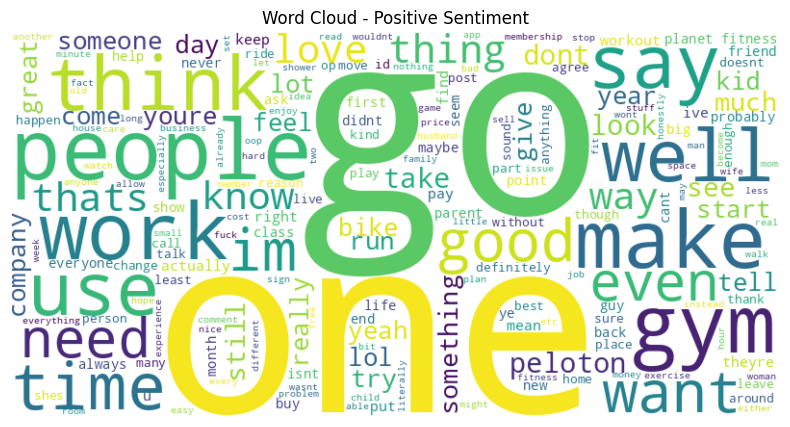

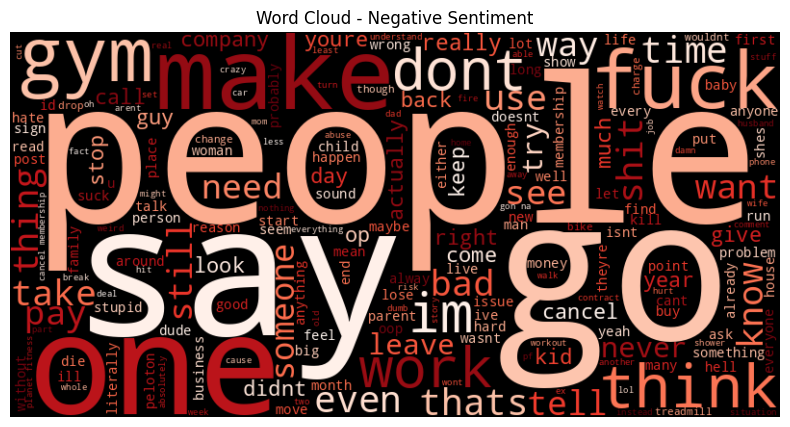

In [20]:
from wordcloud import WordCloud

# Positive words
positive_text = " ".join(df_cleaned[df_cleaned["ml_sentiment"]=="positive"]["lemmatized_comment"])
wc_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Sentiment")
plt.show()

# Negative words
negative_text = " ".join(df_cleaned[df_cleaned["ml_sentiment"]=="negative"]["lemmatized_comment"])
wc_neg = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Negative Sentiment")
plt.show()

